In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotSDerror as psd

### 5.2.2 训练算法：使用梯度上升找到最佳参数

In [2]:
def load_dataset():
    data_mat = []
    label_mat = []
    fr = open('testSet.txt', 'r', encoding='utf-8')
    for line in fr.readlines():
        line_arr = line.strip().split()
        data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
        label_mat.append(int(line_arr[2]))
    return data_mat, label_mat

def sigmoid(inx):
    return 1.0 / (1 + np.exp(-inx))

def gradient_ascent(data_mat_in, class_labels):
    data_matrix = np.mat(data_mat_in)
    label_matrix = np.mat(class_labels).transpose()
    m, n = np.shape(data_matrix)
    alpha = 0.001
    max_cycles = 500
    weights = np.ones((n, 1))
    for k in range(max_cycles):
        h = sigmoid(data_matrix * weights)
        error = (label_matrix - h)
        weights = weights + alpha * data_matrix.transpose() * error
    return weights

In [3]:
dataArr, labelMat = load_dataset()

In [4]:
gradient_ascent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3 画出决策边界

In [5]:
def plot_best_fit(weights):
    dataMat, labelMat = load_dataset()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

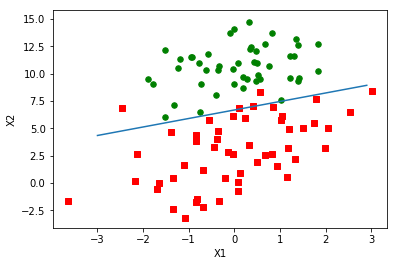

In [6]:
weight = gradient_ascent(dataArr, labelMat)
plot_best_fit(weight.getA())

### 5.2.4 训练算法：随机梯度上升

In [7]:
def stoc_grad_ascent0(data_mat, class_labels):
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(data_mat[i] * weights)
        error = class_labels[i] - h
        weights = weights + alpha * error * data_mat[i]
    return weights

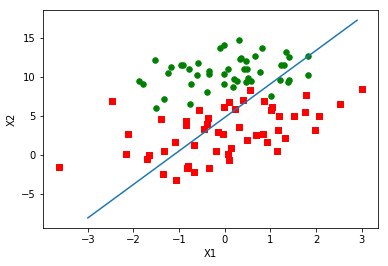

In [8]:
weights = stoc_grad_ascent0(np.array(dataArr), labelMat)
plot_best_fit(weights)

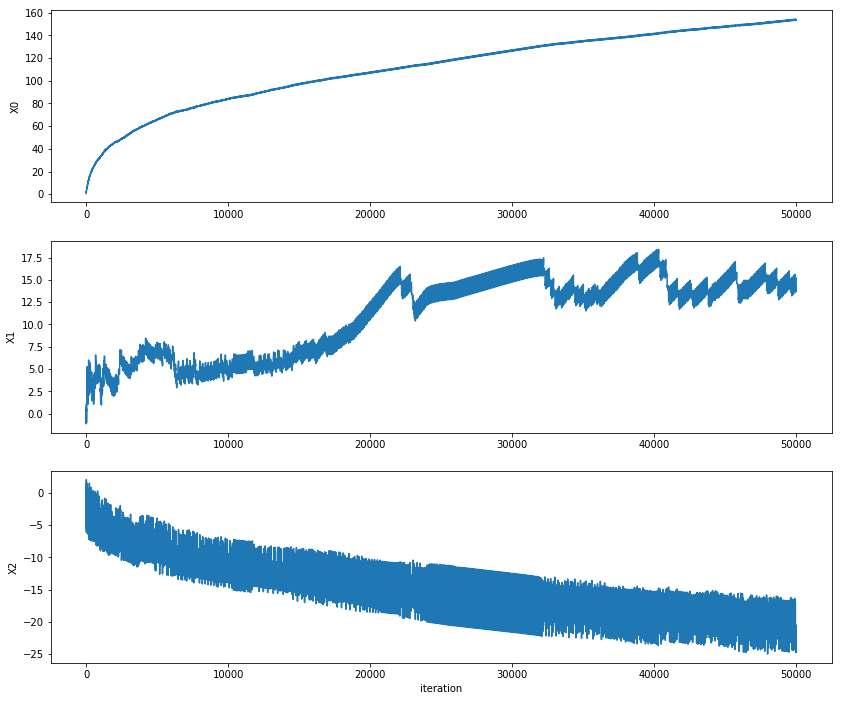

In [9]:
func = psd.stocGradAscent0
psd.plot_sd_error(func)

In [10]:
def stoc_grad_ascent1(data_mat, class_labels, numIter=150):
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0+j+i) + 0.01  # alpha 在每次迭代时需要调整
            randIndex = int(np.random.uniform(0, len(dataIndex)))  # 随机选取更新
            h = sigmoid(np.sum(data_mat[randIndex] * weights))
            error = class_labels[randIndex] - h
            weights = weights + alpha * error * data_mat[randIndex]
            del[dataIndex[randIndex]]
    return weights

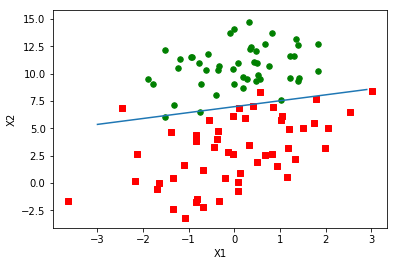

In [11]:
weights = stoc_grad_ascent1(np.array(dataArr), labelMat)
plot_best_fit(weights)

[ 13.8000878    1.43246146  -2.1106172 ]


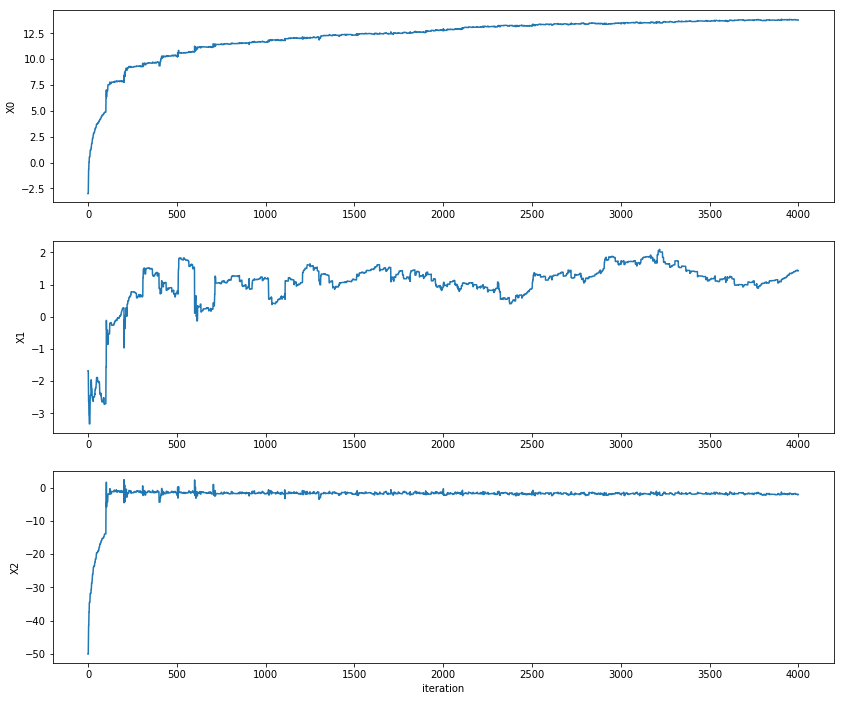

In [12]:
func = psd.stocGradAscent1
psd.plot_sd_error(func)

## 5.3 示例：从疝气病证预测病马的死亡率

In [13]:
def classify_vec(inx, weights):
    prob = sigmoid(np.sum(inx*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colic_test():
    frTrain = open('horseColicTraining.txt', 'r', encoding='utf-8')
    frTest = open('horseColicTest.txt', 'r', encoding='utf-8')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stoc_grad_ascent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classify_vec(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print("The error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTest = 10
    errorSum = 0.0
    for k in range(numTest):
        errorSum += colic_test()
    print("After %d iterations the average error rate is: %f" % (numTest, errorSum / float(numTest)))

In [14]:
multiTest()

/Users/gaussic/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


The error rate of this test is: 0.283582
The error rate of this test is: 0.373134
The error rate of this test is: 0.417910
The error rate of this test is: 0.388060
The error rate of this test is: 0.447761
The error rate of this test is: 0.447761
The error rate of this test is: 0.373134
The error rate of this test is: 0.343284
The error rate of this test is: 0.373134
The error rate of this test is: 0.358209
After 10 iterations the average error rate is: 0.380597
